# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from IPython import get_ipython
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import (
    KBinsDiscretizer, StandardScaler, OneHotEncoder, 
)
from IPython.core.pylabtools import figsize

# figsize(12, 8)
# sns.set()

In [2]:
countries = pd.read_csv("countries.csv", decimal=",", encoding="utf-8")

new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
countries["Country"] = countries["Country"].str.rstrip().str.lstrip()
countries["Region"] = countries["Region"].str.rstrip().str.lstrip()
countries.to_csv('fit_countries.csv', sep=',', encoding='utf-8', decimal='.', index=False)

In [6]:
countries = pd.read_csv('fit_countries.csv')
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [7]:
def q1():
   
   return sorted(countries["Region"].unique().tolist())

q1()

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [9]:
countries["Pop_density"].head()

0     48.0
1    124.6
2     13.8
3    290.4
4    152.1
Name: Pop_density, dtype: float64

In [10]:
discretizer = KBinsDiscretizer(n_bins = 10, strategy = 'quantile', encode = 'ordinal')
score_bins = discretizer.fit_transform(countries[["Pop_density"]])


In [11]:
def get_interval(bin_idx, bin_edges):

  return f"{np.round(bin_edges[bin_idx], 2):.2f} ⊢ {np.round(bin_edges[bin_idx+1], 2):.2f}"


bin_edges_quantile = discretizer.bin_edges_[0]

print(f"Bins quantile")
print(f"interval: #elements\n")
for i in range(len(discretizer.bin_edges_[0])-1):
    print(f"{get_interval(i, bin_edges_quantile)}: {sum(score_bins[:, 0] == i)}")

Bins quantile
interval: #elements

0.00 ⊢ 10.14: 23
10.14 ⊢ 21.22: 23
21.22 ⊢ 39.48: 22
39.48 ⊢ 59.80: 23
59.80 ⊢ 78.80: 22
78.80 ⊢ 105.54: 23
105.54 ⊢ 150.12: 23
150.12 ⊢ 253.70: 22
253.70 ⊢ 396.74: 23
396.74 ⊢ 16271.50: 23


In [12]:
def q2():
    discretizer = KBinsDiscretizer(n_bins = 10, strategy = 'quantile', encode = 'ordinal')
    score_bins = discretizer.fit_transform(countries[["Pop_density"]])
    # Quantil 1 == elemento 0, quantil 10 == elemento 9

    return int(sum(score_bins.flatten() > 8))


q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [34]:
def q3():
    onehotencoder = OneHotEncoder(dtype='object')
    new_region = countries[['Region', 'Climate']].fillna(0)
    encoded = onehotencoder.fit_transform(new_region[['Region', 'Climate']])
    
    return encoded.shape[1]


q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [15]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [16]:
test_country_df = pd.DataFrame(data=[test_country], columns = countries.columns)
test_country_df

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.044217,-0.275281,0.132559,-0.805485,1.011978,0.618918,1.007486,0.202399,-0.043679,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


In [17]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

num_pipeline.fit_transform(countries._get_numeric_data())

array([[ 0.01969468,  0.02758332, -0.19984434, ...,  1.63657562,
        -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748, -0.15360296, ...,  0.59516349,
        -0.70631815,  0.08342432],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.32662697,
         2.39091078, -1.67396905],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.08738364,
         1.4286649 , -1.0798325 ],
       [-0.14654488,  0.08642673, -0.21958445, ...,  0.51072467,
         0.06047154, -0.47944188],
       [-0.14029829, -0.11624192, -0.20992568, ...,  0.22222537,
        -0.29285312,  0.08342432]])

In [18]:
test_transformation = num_pipeline.transform(test_country_df._get_numeric_data())
test_transformation

array([[-0.24432501, -0.33489095, -0.22884735, -0.29726002,  0.01959086,
        -1.02861728, -0.96623348, -4.35427242, -1.03720972, -1.04685743,
        -0.55058149, -5.10112169, -1.21812201, -2.02455164, -1.99092137,
        -7.04915046, -0.13915481,  0.03490335]])

In [19]:
colnames = list(countries._get_numeric_data().columns)
colnames

['Population',
 'Area',
 'Pop_density',
 'Coastline_ratio',
 'Net_migration',
 'Infant_mortality',
 'GDP',
 'Literacy',
 'Phones_per_1000',
 'Arable',
 'Crops',
 'Other',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [20]:
def q4():
    num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    ])

    num_pipeline.fit_transform(countries._get_numeric_data())

    test_country_df = pd.DataFrame(data=[test_country], columns = countries.columns)
    test_transformation = num_pipeline.transform(test_country_df._get_numeric_data())
    colnames = list(countries._get_numeric_data().columns)
    test_df = pd.DataFrame(test_transformation, columns = colnames)

    return float(round(test_df.Arable[0], 3))


q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [21]:
net = countries["Net_migration"].copy()

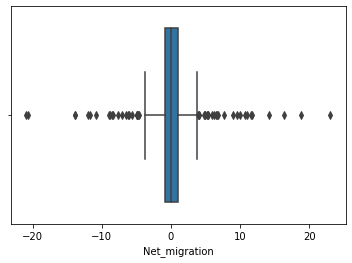

In [22]:
sns.boxplot(net);

In [23]:
q1, q3 = net.quantile([0.25, 0.75])
iqr = q3 - q1

print(f'Primeiro quartil: {q1:1f}\nTerceiro quartil: {q3:1f}\nIQR: {iqr:1f}')

Primeiro quartil: -0.927500
Terceiro quartil: 0.997500
IQR: 1.925000


In [24]:
lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr

print(f'Limite inferior: {lim_inf:1f}\nLimite superior: {lim_sup:1f}')

Limite inferior: -3.815000
Limite superior: 3.885000


In [25]:
inf_outlier, sup_outlier = net[net < lim_inf], net[net > lim_sup]

outliers = pd.concat([inf_outlier, sup_outlier])
np.array(outliers)

array([ -4.93, -20.71,  -6.15,  -6.47,  -4.9 ,  -4.58, -12.07, -13.87,
        -8.58,  -4.7 ,  -8.37, -13.92,  -4.92,  -6.04,  -4.87, -20.99,
        -7.11,  -4.86,  -7.64, -11.7 ,  -5.69,  -8.81, -10.83,  -8.94,
        23.06,   6.6 ,  10.76,   3.98,  10.01,   5.96,  18.75,   6.27,
         5.24,   4.99,   5.36,   6.59,  14.18,   4.85,   8.97,   4.86,
         6.78,   7.75,   4.05,   9.61,  16.29,  10.98,  11.53,   5.37,
         4.05,  11.68])

In [26]:
def q5():
    net = countries["Net_migration"].copy()
    q1, q3 = net.quantile([0.25, 0.75])
    iqr = q3 - q1
    lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
    inf_outlier, sup_outlier = net[net < lim_inf], net[net > lim_sup]
    # Há um número muito grande de outliers, não removeria

    return len(inf_outlier), len(sup_outlier), False


q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [27]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [28]:
count_vectorizer = CountVectorizer()
newsgroups_counts = count_vectorizer.fit_transform(newsgroup.data)

In [29]:
words_idx = sorted([count_vectorizer.vocabulary_.get(f"{word.lower()}") for word in [u"phone"]])
found = pd.DataFrame(newsgroups_counts[:, words_idx].toarray(), columns=np.array(count_vectorizer.get_feature_names())[words_idx])
found[found["phone"] == 1].head()

,phone
5,1
8,1
37,1
43,1
66,1


In [31]:
def q6():
    count_vectorizer = CountVectorizer()
    newsgroups_counts = count_vectorizer.fit_transform(newsgroup.data)
    word_idx = sorted([count_vectorizer.vocabulary_.get("phone")])
    occurencies = pd.DataFrame(
        newsgroups_counts[:, word_idx].toarray(), 
        columns=np.array(count_vectorizer.get_feature_names())[word_idx]
    )

    return int(occurencies["phone"].sum())


q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [32]:
tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(newsgroups_counts)

newsgroups_tfidf = tfidf_transformer.transform(newsgroups_counts)

tf_IDF_matrix = pd.DataFrame(newsgroups_tfidf[:, words_idx].toarray(), columns=np.array(count_vectorizer.get_feature_names())[words_idx])
tf_IDF_matrix[tf_IDF_matrix["phone"] != 0].head(10)

,phone
5,0.047752
8,0.003878
34,0.077240
37,0.007246
43,0.041626
52,0.061870
66,0.035081
78,0.083525
82,0.130126
88,0.050443


In [33]:
def q7():
    tfidf = TfidfVectorizer()
    tfidf_transform = tfidf.fit_transform(newsgroup.data)
    phone_tfidf = pd.DataFrame(tfidf_transform.toarray(), columns = tfidf.get_feature_names())
    
    return float(phone_tfidf["phone"].sum().round(3))


q7()

8.888